In [2]:
# Importing libraries and packages:

import os
import sys
import numpy as np
import pandas as pd     #need version 1.4.0 ! 
from pandas import json_normalize 
sys.path.append(os.getcwd())
from pathlib import Path  
import matplotlib.pyplot as pltpip 
from joblib import dump, load
# import dask.dataframe as dd
from tqdm import tqdm
from matplotlib import pyplot as plt
import random

In [3]:
# USE THIS AND SAVE ALL THE JSON

# Load CVEs from the following years
CVE_YEARS = ['2015','2016','2017','2018','2019','2020','2021','2022','2022']

cve_all_raw = pd.DataFrame()

for cveyear in CVE_YEARS:
  CVE_FEED = 'nvdcve-1.1-' + cveyear + '.json'
# Without the zip files you can retrieve data from api:
#   CVE_URL = 'https://nvd.nist.gov/feeds/json/cve/1.1/' + CVE_FEED + '.zip'
#   !wget -qq $CVE_URL
#   !unzip $CVE_FEED
  cvejson = pd.read_json(CVE_FEED)
  cve_all_raw = cve_all_raw.append(pd.json_normalize(cvejson['CVE_Items']))
  
cve_all = cve_all_raw
print('Loaded ', len(cve_all_raw), ' CVEs')

/var/folders/91/cgqny9jx7sd7ckws5w457w940000gp/T/ipykernel_1637/3538101639.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cve_all_raw = cve_all_raw.append(pd.json_normalize(cvejson['CVE_Items']))
/var/folders/91/cgqny9jx7sd7ckws5w457w940000gp/T/ipykernel_1637/3538101639.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cve_all_raw = cve_all_raw.append(pd.json_normalize(cvejson['CVE_Items']))
/var/folders/91/cgqny9jx7sd7ckws5w457w940000gp/T/ipykernel_1637/3538101639.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cve_all_raw = cve_all_raw.append(pd.json_normalize(cvejson['CVE_Items']))
/var/folders/91/cgqny9jx7sd7ckws5w457w940000gp/T/ipykernel_1637/3538101639.py:15: FutureWarning: The frame.append method is dep

Loaded  159306  CVEs


In [4]:
# Get vendor and product name and put in last columns:

cve_all['description']=cve_all.apply(lambda row: row['cve.description.description_data'][0]['value'], axis=1)

def get_vendor(row):
  if len(row['configurations.nodes']) > 0:
    if len(row['configurations.nodes'][0].get('cpe_match')) > 0:
      return pd.Series(row['configurations.nodes'][0].get('cpe_match')[0]['cpe23Uri'].split(":")[3:5])
    else:
      return pd.Series(row['configurations.nodes'][0].get('children')[0].get('cpe_match')[0]['cpe23Uri'].split(":")[3:5])
  else:
    return pd.Series(['unknown', 'unknown'])


cve_all[['vendor', 'product']]=cve_all.apply(lambda row: get_vendor(row), axis=1)
cve_all.head()

,publishedDate,lastModifiedDate,cve.data_type,cve.data_format,cve.data_version,cve.CVE_data_meta.ID,cve.CVE_data_meta.ASSIGNER,cve.problemtype.problemtype_data,cve.references.reference_data,cve.description.description_data,...,impact.baseMetricV3.cvssV3.confidentialityImpact,impact.baseMetricV3.cvssV3.integrityImpact,impact.baseMetricV3.cvssV3.availabilityImpact,impact.baseMetricV3.cvssV3.baseScore,impact.baseMetricV3.cvssV3.baseSeverity,impact.baseMetricV3.exploitabilityScore,impact.baseMetricV3.impactScore,description,vendor,product
0,2015-01-13T22:59Z,2018-10-12T22:07Z,CVE,MITRE,4.0,CVE-2015-0001,secure@microsoft.com,"[{'description': [{'lang': 'en', 'value': 'CWE...",[{'url': 'http://packetstormsecurity.com/files...,"[{'lang': 'en', 'value': 'The Windows Error Re...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The Windows Error Reporting (WER) component in...,microsoft,windows_rt
1,2015-01-13T22:59Z,2018-10-12T22:07Z,CVE,MITRE,4.0,CVE-2015-0002,secure@microsoft.com,"[{'description': [{'lang': 'en', 'value': 'CWE...",[{'url': 'http://twitter.com/sambowne/statuses...,"[{'lang': 'en', 'value': 'The AhcVerifyAdminCo...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The AhcVerifyAdminContext function in ahcache....,microsoft,windows_rt
2,2015-02-11T03:00Z,2019-05-14T19:39Z,CVE,MITRE,4.0,CVE-2015-0003,secure@microsoft.com,"[{'description': [{'lang': 'en', 'value': 'CWE...",[{'url': 'http://www.securityfocus.com/bid/724...,"[{'lang': 'en', 'value': 'win32k.sys in the ke...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,win32k.sys in the kernel-mode drivers in Micro...,microsoft,windows_server_2008
3,2015-01-13T22:59Z,2019-02-26T14:04Z,CVE,MITRE,4.0,CVE-2015-0004,secure@microsoft.com,"[{'description': [{'lang': 'en', 'value': 'CWE...",[{'url': 'https://code.google.com/p/google-sec...,"[{'lang': 'en', 'value': 'The User Profile Ser...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The User Profile Service (aka ProfSvc) in Micr...,microsoft,windows_rt
4,2015-03-11T10:59Z,2019-05-08T22:03Z,CVE,MITRE,4.0,CVE-2015-0005,secure@microsoft.com,"[{'description': [{'lang': 'en', 'value': 'CWE...",[{'url': 'http://seclists.org/fulldisclosure/2...,"[{'lang': 'en', 'value': 'The NETLOGON service...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The NETLOGON service in Microsoft Windows Serv...,microsoft,windows_server_2008


In [5]:
# Remove unknowns and reset the index:

cve_all_r = cve_all[cve_all['vendor']!='unknown'] 

cve_all_r.reset_index(drop=True, inplace=True)

cve_all_r[['vendor','product']].value_counts()  

vendor         product            
google         android                6709
               chrome                 2202
linux          linux_kernel           1906
apple          mac_os_x               1604
microsoft      windows_server_2008    1421
                                      ... 
elasticsearch  packetbeat                1
               output_plugin             1
pg             oral-b_app                1
elasticsearch  cloud_enterprise          1
iptime         nas-i_firmware            1
Length: 28322, dtype: int64

In [16]:
print(cve_all_r.columns)

Index(['publishedDate', 'lastModifiedDate', 'cve.data_type', 'cve.data_format',
       'cve.data_version', 'cve.CVE_data_meta.ID',
       'cve.CVE_data_meta.ASSIGNER', 'cve.problemtype.problemtype_data',
       'cve.references.reference_data', 'cve.description.description_data',
       'configurations.CVE_data_version', 'configurations.nodes',
       'impact.baseMetricV2.cvssV2.version',
       'impact.baseMetricV2.cvssV2.vectorString',
       'impact.baseMetricV2.cvssV2.accessVector',
       'impact.baseMetricV2.cvssV2.accessComplexity',
       'impact.baseMetricV2.cvssV2.authentication',
       'impact.baseMetricV2.cvssV2.confidentialityImpact',
       'impact.baseMetricV2.cvssV2.integrityImpact',
       'impact.baseMetricV2.cvssV2.availabilityImpact',
       'impact.baseMetricV2.cvssV2.baseScore', 'impact.baseMetricV2.severity',
       'impact.baseMetricV2.exploitabilityScore',
       'impact.baseMetricV2.impactScore',
       'impact.baseMetricV2.obtainAllPrivilege',
       'impact.

In [6]:
# Count amount of CVE's in products:
cve_all_r_test_info_products = cve_all_r[['vendor','product']].value_counts() 

info_products_2015_2022 = cve_all_r_test_info_products.value_counts()


# Count amount of occurences of every CVE
cve_all_r_test_info_items = cve_all_r[['cve.CVE_data_meta.ID']].value_counts() 

info_items_2015_2022 = cve_all_r_test_info_items.value_counts()

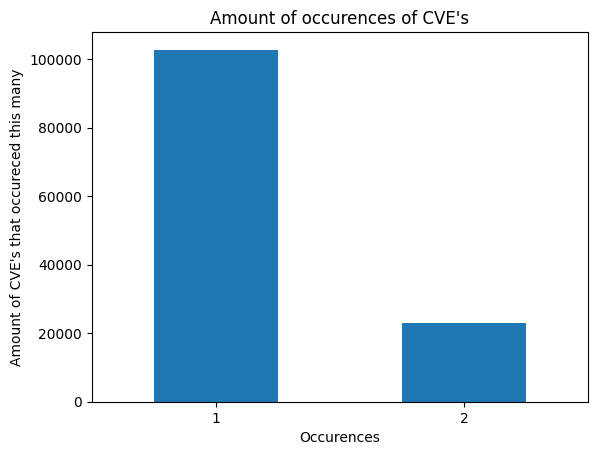

In [6]:
# Create a plot for the occurences of the CVE's 
# As can be concluded from this plot: CVE's only occur twice or once. This could cause a cold-start item problem.... 
# We cannot filter these CVE's, maybe only the CVE's that occur only once.

info_items_2015_2022.plot.bar()

# Set the title and labels
plt.title("Amount of occurences of CVE's")
plt.xlabel("Occurences")
plt.ylabel("Amount of CVE's that occureced this many")

plt.xticks(rotation=0)

# plt.show()
plt.savefig('2015-2022itemss.jpg', bbox_inches="tight")


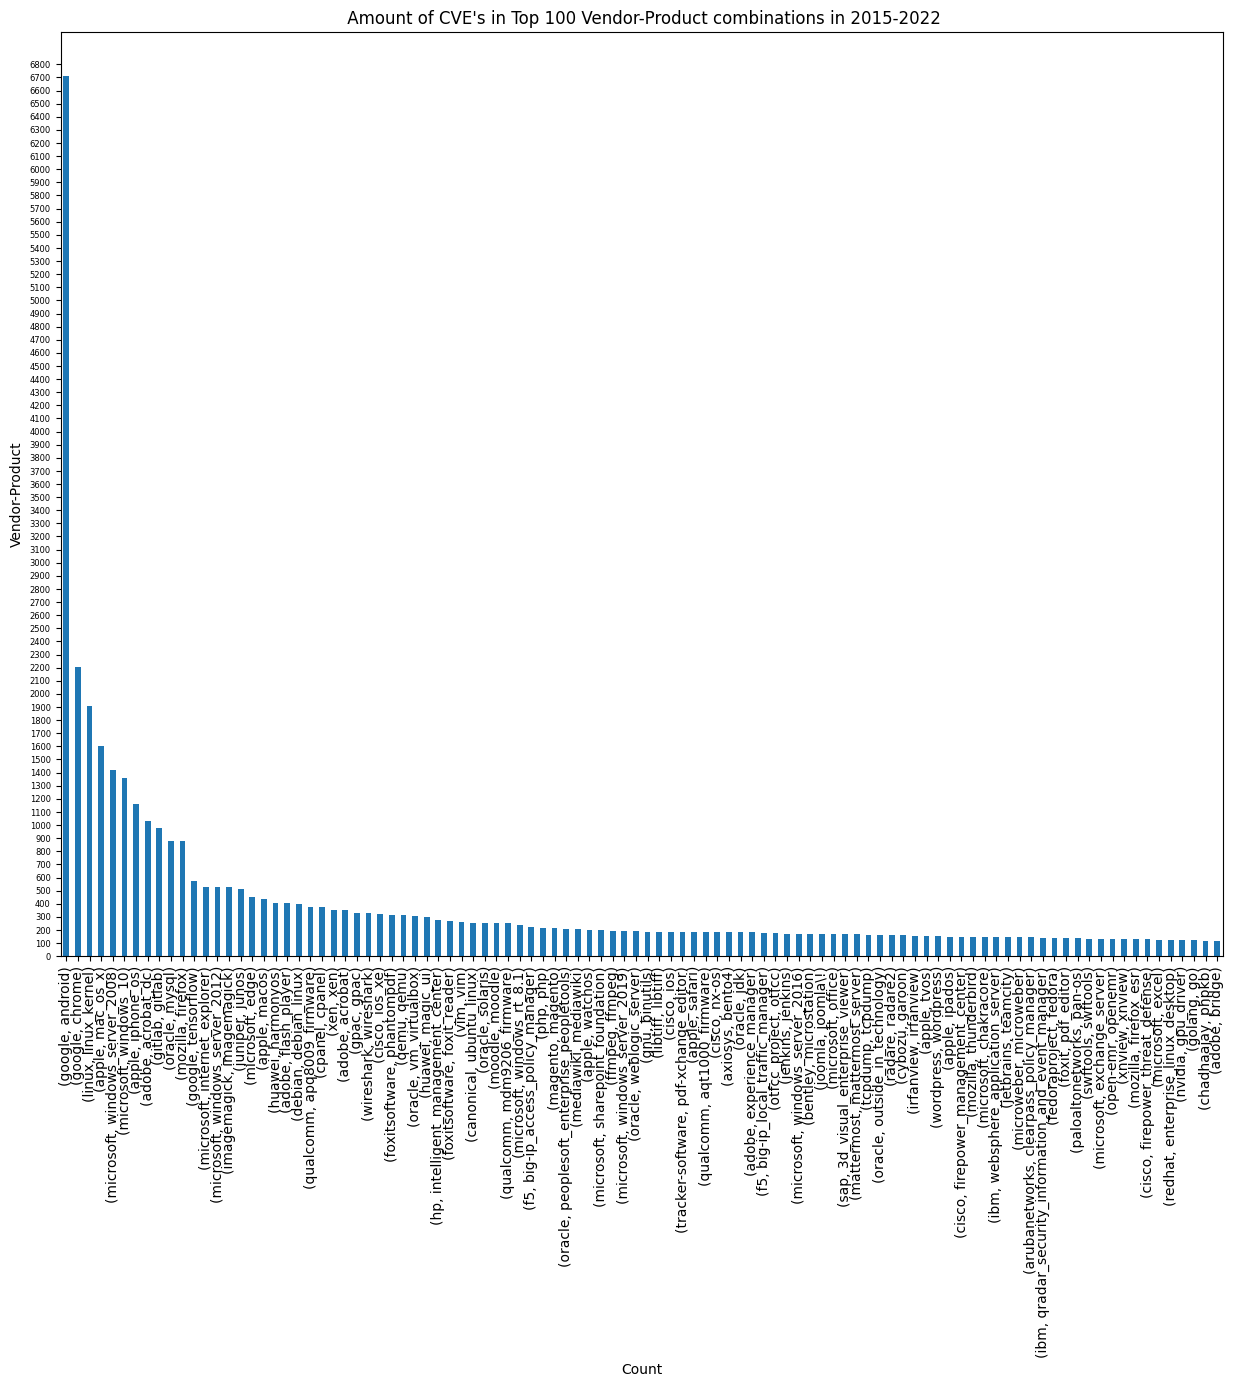

In [7]:
# Create a plot for the amount of CVE's in the top 100 products 

top_n = 100
top_values = cve_all_r_test_info_products.head(top_n)

# Create a bar ploot
fig, ax = plt.subplots(figsize=(15, 12)) 
top_values.plot(kind='bar', ax=ax)

# Set the title and labels
plt.title(f" Amount of CVE's in Top {top_n} Vendor-Product combinations in 2015-2022")
plt.xlabel("Count")
plt.ylabel("Vendor-Product")
plt.yticks(fontsize=6)  

# Set the y-axis tick locations
yticks = np.arange(0, top_values.max() + 100, 100)
plt.yticks(yticks)

# plt.show()
plt.savefig('2015-2022cveproducts.jpg', bbox_inches="tight")



In [6]:
# Select vendor-product pairs that occur less often than 20 times and delete these from the data

selected_pairs = cve_all_r_test_info_products[cve_all_r_test_info_products > 20]

mask = cve_all_r[['vendor', 'product']].apply(tuple, axis=1).isin(selected_pairs.index)

cve_all_r_filtered = cve_all_r[mask]

print(int(((len(cve_all_r)- len(cve_all_r_filtered) ) / len(cve_all_r)) * 100),"%", "of the data is pruned " )


NameError: name 'cve_all_r_test_info_products' is not defined

In [9]:

print(cve_all['cve.problemtype.problemtype_data'][0].iloc[0][0]['description'][0]['value'])

# cve_all2 = cve_all[0:100]
# cve_all2['cwe']=cve_all2.apply(lambda row: row['cve.problemtype.problemtype_data'][0].iloc[0][0]['description'][0]['value'], axis=1)

# print(cve_all2)

values = cve_all['cve.problemtype.problemtype_data'].apply(lambda x: x[0]['description'][0]['value'])
print(values)

CWE-264


IndexError: list index out of range

In [7]:
cve_all2 = cve_all

values = []

for data in cve_all2['cve.problemtype.problemtype_data']:
    try:
        value = data[0]['description'][0]['value']
        values.append(value)
    except (IndexError, KeyError):
        values.append(None)

# print(values)
cve_all2['cwe'] = values

In [22]:
print(cve_all['impact.baseMetricV2.cvssV2.baseScore'].unique)

uniquevalscore = cve_all2['impact.baseMetricV2.cvssV2.baseScore'].unique()

uniquecountscore = len(uniquevalscore)

print(uniquecountscore)

<bound method Series.unique of 0        1.9
1        7.2
2        6.9
3        7.2
4        4.3
        ... 
23687    NaN
23688    NaN
23689    NaN
23690    NaN
23691    NaN
Name: impact.baseMetricV2.cvssV2.baseScore, Length: 159306, dtype: float64>
70


In [15]:
print(cve_all2['cwe'])

uniqueval = cve_all2['cwe'].unique()

uniquecount = len(uniqueval)

print(uniquecount)

0        CWE-264
1        CWE-264
2        CWE-476
3        CWE-264
4        CWE-254
          ...   
23687    CWE-256
23688    CWE-601
23689    CWE-862
23690    CWE-434
23691    CWE-862
Name: cwe, Length: 159306, dtype: object
351


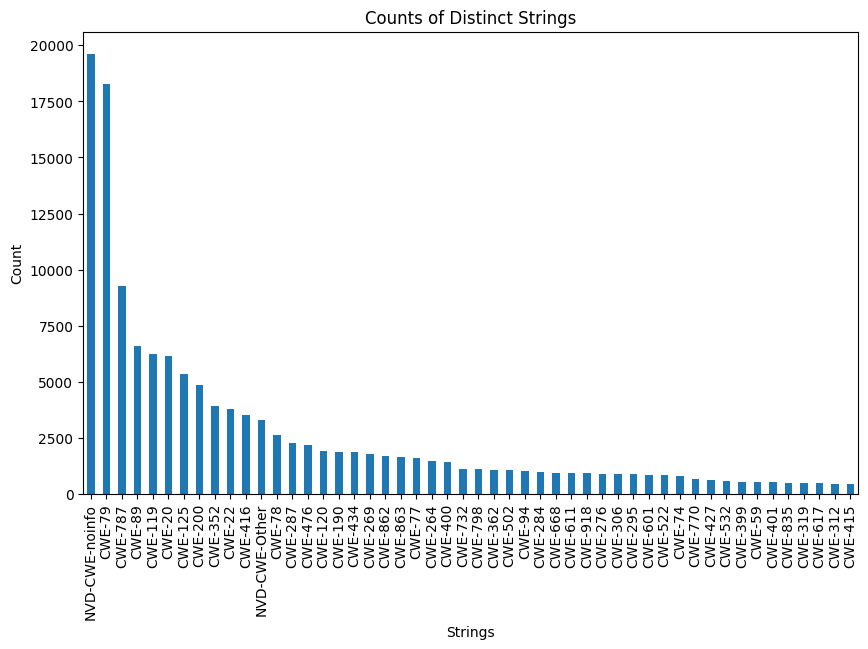

In [9]:
value_counts = cve_all2['cwe'].value_counts().head(50)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.title('Counts of Distinct Strings')
plt.xlabel('Strings')
plt.ylabel('Count')
plt.show()

In [62]:
# value_counts = cve_all2['cwe']
result = cve_all2.groupby('cwe')['cve.CVE_data_meta.ID'].apply(list).reset_index()


In [64]:
print(result[0:10])

result.to_csv('/Users/elisestijger/Desktop/Thesis2023-main/Recommendation_systems_CVE/cweandcve.csv', index=False)


        cwe                               cve.CVE_data_meta.ID
0     CWE-1                   [CVE-2016-10380, CVE-2016-10381]
1  CWE-1004                   [CVE-2019-25091, CVE-2021-34563]
2  CWE-1021  [CVE-2016-5710, CVE-2017-0492, CVE-2017-11290,...
3  CWE-1022     [CVE-2020-36624, CVE-2022-1583, CVE-2022-1583]
4  CWE-1026                     [CVE-2022-4147, CVE-2022-4147]
5  CWE-1076                                    [CVE-2021-1268]
6  CWE-1077                     [CVE-2022-4293, CVE-2022-4293]
7  CWE-1108                     [CVE-2022-2642, CVE-2022-2642]
8   CWE-112   [CVE-2020-27282, CVE-2022-28213, CVE-2022-28213]
9   CWE-113  [CVE-2015-0733, CVE-2015-1445, CVE-2016-5325, ...


In [ ]:
# Assuming 'df' is your DataFrame and 'column2' is the column with lists of values
# duplicate_values = result[result.duplicated('cve.CVE_data_meta.ID', keep=False)]['cve.CVE_data_meta.ID']

# Assuming 'df' is your DataFrame and 'column2' is the column with lists of values
duplicate_values = []
checked_values = []

for index, row in cve_all2.iterrows():
    if row['cve.CVE_data_meta.ID'] in checked_values:
        if row['cve.CVE_data_meta.ID'] not in duplicate_values:
            duplicate_values.append(row['cve.CVE_data_meta.ID'])
    else:
        checked_values.append(row['cve.CVE_data_meta.ID'])

if duplicate_values:
    print("Values occurring in multiple rows:")
    for value in duplicate_values:
        print(value)
else:
    print("No values occurring in multiple rows.")



In [70]:
# # Assuming 'df' is your DataFrame and 'column' is the column with lists of values
# specific_value = 
# count = sum(specific_value in sublist for sublist in cve_all2['cve.CVE_data_meta.ID'])

# print("Count of '{}' in the column: {}".format(specific_value, count))


# Assuming 'df' is your DataFrame and 'column' is the column with lists of values
specific_value = 'CVE-2022-4147'
rows = [index for index, sublist in cve_all2['cve.CVE_data_meta.ID'].iteritems() if specific_value in sublist]
count = len(rows)

print("Count of '{}' in the column: {}".format(specific_value, count))
print("Row numbers where '{}' occurs: {}".format(specific_value, rows))



Count of 'CVE-2022-4147' in the column: 16
Row numbers where 'CVE-2022-4147' occurs: [19120, 19121, 19122, 19123, 19124, 19125, 19126, 19127, 19120, 19121, 19122, 19123, 19124, 19125, 19126, 19127]


In [80]:
# Assuming 'cve_all2' is your DataFrame and 'cve.CVE_data_meta.ID' is the column with lists of values
specific_value = 'CVE-2022-4147'

rows = [row['index'] for _, row in cve_all2.reset_index().iterrows() if specific_value in row['cve.CVE_data_meta.ID']]
count = len(rows)

print("Count of '{}' in the column: {}".format(specific_value, count))
print("Index numbers where '{}' occurs: {}".format(specific_value, rows))


Count of 'CVE-2022-4147' in the column: 16
Index numbers where 'CVE-2022-4147' occurs: [19120, 19121, 19122, 19123, 19124, 19125, 19126, 19127, 19120, 19121, 19122, 19123, 19124, 19125, 19126, 19127]


In [87]:
# Assuming 'df' is your DataFrame and 'column' is the column with lists of strings
search_value = 'CVE-2022-4869'

matching_rows = result[result['cve.CVE_data_meta.ID'].apply(lambda x: search_value in x)]
row_indices = matching_rows.index.tolist()

print("Rows where '{}' exists: {}".format(search_value, row_indices))


Rows where 'CVE-2022-4869' exists: [349]


In [100]:
print(cve_all[cve_all['cve.CVE_data_meta.ID']== 'CVE-2021-44695']['product'])

20389    simatic_s7-plcsim_advanced_firmware
Name: product, dtype: object


In [86]:
# Assuming 'df' is your DataFrame and 'column' is the column with lists
value_counts = result['cve.CVE_data_meta.ID'].apply(pd.Series).stack().value_counts()
duplicates = value_counts[value_counts > 1]

if duplicates.empty:
    print("No values occur more than once.")
else:
    print("Values that occur more than once:")
    print(duplicates)


Values that occur more than once:
CVE-2022-4869     2
CVE-2022-34013    2
CVE-2022-44291    2
CVE-2022-44294    2
CVE-2022-44295    2
                 ..
CVE-2022-28307    2
CVE-2022-28274    2
CVE-2022-28267    2
CVE-2022-28245    2
CVE-2022-28268    2
Length: 22973, dtype: int64


In [77]:
# print(result.loc[19120])
row_index = 3  # Specify the index of the row you want to print

print("Row with index", row_index, ":")
print(result.loc[row_index])

Row with index 3 :
cwe                                                           CWE-1022
cve.CVE_data_meta.ID    [CVE-2020-36624, CVE-2022-1583, CVE-2022-1583]
Name: 3, dtype: object


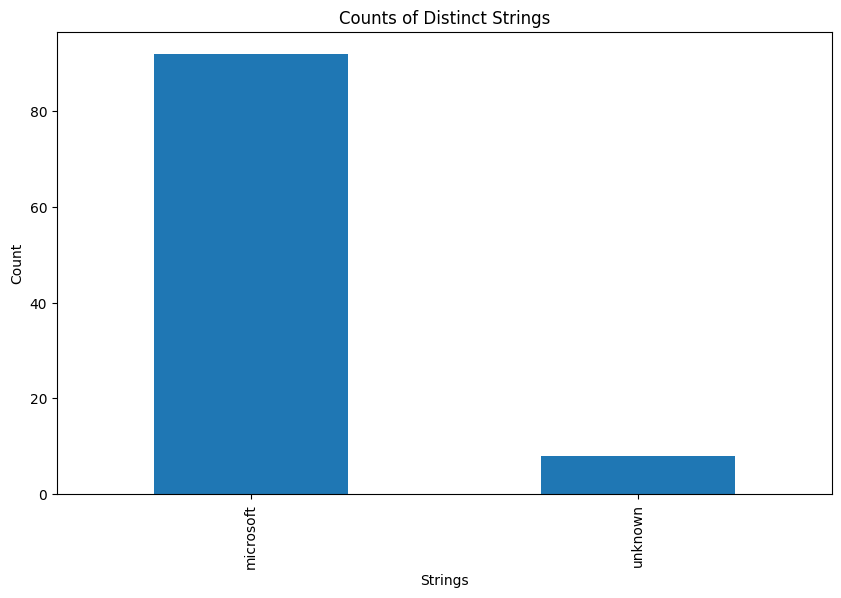

In [55]:
value_counts = cve_all2['vendor'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.title('Counts of Distinct Strings')
plt.xlabel('Strings')
plt.ylabel('Count')
plt.show()

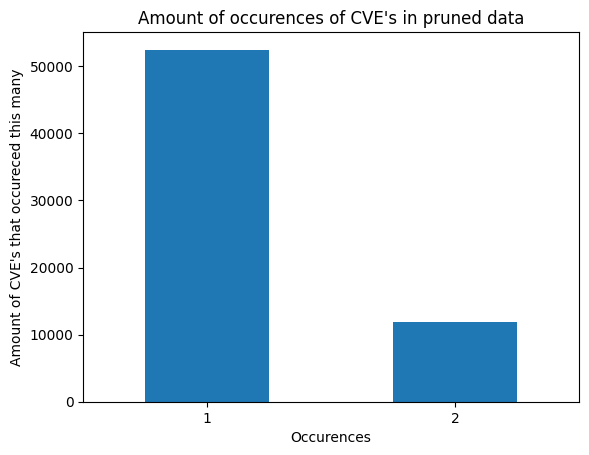

In [9]:
# Count amount of occurences of every CVE -> In pruned data 

cve_all_r_filteredinfo_items = cve_all_r_filtered[['cve.CVE_data_meta.ID']].value_counts() 

info_items_2015_2022_filtered = cve_all_r_filteredinfo_items.value_counts()

info_items_2015_2022_filtered.plot.bar()

# Set the title and labels
plt.title("Amount of occurences of CVE's in pruned data")
plt.xlabel("Occurences")
plt.ylabel("Amount of CVE's that occureced this many")

plt.xticks(rotation=0)

# plt.show()
plt.savefig('2015-2022itemss.jpg', bbox_inches="tight")

In [10]:
# CROSS VALIDATION 

# Data for cross validation 
copy_cve_all_r_filtered = cve_all_r_filtered

# Calculate the sample size for each fold
sample_size = len(copy_cve_all_r_filtered) // 20

# Get all unique products
unique_products = np.unique(copy_cve_all_r_filtered['product'].to_numpy())

# Create 20 empty folds
folds = [pd.DataFrame(columns=copy_cve_all_r_filtered.columns) for _ in range(20)]

# TEST with small dataset
unique_products = unique_products[0:10]
copy_cve_all_r_filtered = copy_cve_all_r_filtered[0:10000]
folds = [pd.DataFrame(columns=copy_cve_all_r_filtered.columns) for _ in range(3)]
sample_size = len(copy_cve_all_r_filtered) // 20

# Iterate over the unique products and add rows to folds
for index in unique_products:
    product = index

    # Iterate over the folds and add random rows where product from unique products is present. Also delete this row from df so no duplicate rows in the folds
    for i, fold in enumerate(folds):
        if len(fold) < sample_size:
            add_fold = copy_cve_all_r_filtered.query('product == @product') #.sample(n=1)
            if len(add_fold) > 0:
                add_fold = add_fold.sample(n=1)
            fold = fold.append(add_fold)
            folds[i] = fold
            copy_cve_all_r_filtered = copy_cve_all_r_filtered.drop(add_fold.index)

# Fill the rest of rows in the folds randomly
for i, fold in enumerate(folds):
    remaining_rows = sample_size - len(fold)
    if remaining_rows > 0:
        filled_df = copy_cve_all_r_filtered.sample(n=remaining_rows, replace=False)
        copy_cve_all_r_filtered = copy_cve_all_r_filtered.drop(filled_df.index)
        fold = fold.append(filled_df, ignore_index=True)
        folds[i] = fold


/var/folders/91/cgqny9jx7sd7ckws5w457w940000gp/T/ipykernel_9328/1976054048.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fold = fold.append(add_fold)
/var/folders/91/cgqny9jx7sd7ckws5w457w940000gp/T/ipykernel_9328/1976054048.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fold = fold.append(add_fold)
/var/folders/91/cgqny9jx7sd7ckws5w457w940000gp/T/ipykernel_9328/1976054048.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fold = fold.append(add_fold)
/var/folders/91/cgqny9jx7sd7ckws5w457w940000gp/T/ipykernel_9328/1976054048.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fold = fold.append(add_fold)
/var/folders/91/

In [11]:
# Matrix for the Matrix Factorization algorithm, a 1 indicates a CVE being present in the product. 

# Get the data

copymatrix_cve_all_r_filtered = cve_all_r_filtered

# Test with small dataset 
copymatrix_cve_all_r_filtered = copymatrix_cve_all_r_filtered[0:100]

matrix = copymatrix_cve_all_r_filtered.groupby(['product', 'cve.CVE_data_meta.ID']).size().unstack(fill_value=0)

matrix = matrix.applymap(lambda x: 1 if x != 0 else 0)


In [12]:
# Assuming you have a DataFrame named "matrix" with rows representing products
# and columns representing cve.CVE_data_meta.ID

# Create an empty list to store the tuples
result_list = []

# Iterate over the rows of the matrix
for product, row in matrix.iterrows():
    # Iterate over the columns of the matrix
    for cve_id, value in row.iteritems():
        # Append a tuple with the desired values to the result list
        result_list.append((product, cve_id, value))

# Print the resulting list
print(result_list)


[('business_process_manager', 'CVE-2015-0003', 0), ('business_process_manager', 'CVE-2015-0005', 0), ('business_process_manager', 'CVE-2015-0006', 0), ('business_process_manager', 'CVE-2015-0008', 0), ('business_process_manager', 'CVE-2015-0009', 0), ('business_process_manager', 'CVE-2015-0010', 0), ('business_process_manager', 'CVE-2015-0014', 0), ('business_process_manager', 'CVE-2015-0015', 0), ('business_process_manager', 'CVE-2015-0017', 0), ('business_process_manager', 'CVE-2015-0018', 0), ('business_process_manager', 'CVE-2015-0019', 0), ('business_process_manager', 'CVE-2015-0020', 0), ('business_process_manager', 'CVE-2015-0021', 0), ('business_process_manager', 'CVE-2015-0022', 0), ('business_process_manager', 'CVE-2015-0023', 0), ('business_process_manager', 'CVE-2015-0025', 0), ('business_process_manager', 'CVE-2015-0026', 0), ('business_process_manager', 'CVE-2015-0027', 0), ('business_process_manager', 'CVE-2015-0028', 0), ('business_process_manager', 'CVE-2015-0029', 0),

In [13]:
# Assuming you have a list of tuples named "result_list"

# Create a new list to store the modified tuples
modified_list = []

# Iterate over the tuples in the result_list
for tup in result_list:
    product, cve_id, value = tup
    
    # Convert the last element to float and create a modified tuple
    modified_tuple = (product, cve_id, float(value))
    
    # Append the modified tuple to the new list
    modified_list.append(modified_tuple)

# Print the modified list
print(modified_list)


[('business_process_manager', 'CVE-2015-0003', 0.0), ('business_process_manager', 'CVE-2015-0005', 0.0), ('business_process_manager', 'CVE-2015-0006', 0.0), ('business_process_manager', 'CVE-2015-0008', 0.0), ('business_process_manager', 'CVE-2015-0009', 0.0), ('business_process_manager', 'CVE-2015-0010', 0.0), ('business_process_manager', 'CVE-2015-0014', 0.0), ('business_process_manager', 'CVE-2015-0015', 0.0), ('business_process_manager', 'CVE-2015-0017', 0.0), ('business_process_manager', 'CVE-2015-0018', 0.0), ('business_process_manager', 'CVE-2015-0019', 0.0), ('business_process_manager', 'CVE-2015-0020', 0.0), ('business_process_manager', 'CVE-2015-0021', 0.0), ('business_process_manager', 'CVE-2015-0022', 0.0), ('business_process_manager', 'CVE-2015-0023', 0.0), ('business_process_manager', 'CVE-2015-0025', 0.0), ('business_process_manager', 'CVE-2015-0026', 0.0), ('business_process_manager', 'CVE-2015-0027', 0.0), ('business_process_manager', 'CVE-2015-0028', 0.0), ('business_

In [ ]:
import joblib
joblib.dump(cve_all_r_filtered, 'cve_all_r_filtererd.pkl')


In [12]:
import joblib
joblib.dump(cve_all2, 'cveall2CWE.pkl')

['cveall2CWE.pkl']

In [1]:
print(cve_all2)

NameError: name 'cve_all2' is not defined

In [137]:
# DROP EMPTY CWE

cve_all3 = cve_all2[0:10000]

cve_all5 = cve_all3.dropna(subset=['cwe'])

# cve_all4.to_csv('/Users/elisestijger/Desktop/Thesis2023-main/Recommendation_systems_CVE/cveall4.csv', index=False)


In [138]:
# Matrix for the Matrix Factorization algorithm, a 1 indicates a CVE being present in the product. 

# Get the data

copymatrix_cve_all_r_filtered = cve_all5

# Test with small dataset 
# copymatrix_cve_all_r_filtered = copymatrix_cve_all_r_filtered[0:100]

matrixCWE = copymatrix_cve_all_r_filtered.groupby(['product', 'cwe']).size().unstack(fill_value=0)

matrixCWE = matrixCWE.applymap(lambda x: 1 if x != 0 else 0)

In [139]:
# matrixCWE.to_csv('/Users/elisestijger/Desktop/Thesis2023-main/Recommendation_systems_CVE/matrixCWE.csv', index=False)

import joblib
joblib.dump(matrixCWE, 'matrixCWE.pkl')


['matrixCWE.pkl']

In [140]:
matrixCWE.to_csv('/Users/elisestijger/Desktop/Thesis2023-main/Recommendation_systems_CVE/matrixCWE.csv', index=False)


In [141]:
print(matrixCWE)

cwe                          CWE-113  CWE-116  CWE-118  CWE-119  CWE-120  \
product                                                                    
.net_framework                     0        0        0        1        0   
1.1                                0        0        0        0        0   
389_administration_server          0        0        0        0        0   
389_directory_server               0        0        0        0        0   
3d_visual_enterprise_viewer        0        0        0        1        0   
...                              ...      ...      ...      ...      ...   
zotpress                           0        0        0        0        0   
ztree                              0        0        0        0        0   
zurmo_crm                          0        0        0        0        0   
zxhn_h108n_r1a_firmware            0        0        0        0        0   
zxv10_w300_firmware                0        0        0        0        0   

cwe        

In [143]:
from pathlib import Path

filepath = Path('/Users/elisestijger/Desktop/Thesis2023-main/Recommendation_systems_CVE/matrixCWEgood.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
matrixCWE.to_csv(filepath)

In [145]:
print(cve_all['description'])

0        The Windows Error Reporting (WER) component in...
1        The AhcVerifyAdminContext function in ahcache....
2        win32k.sys in the kernel-mode drivers in Micro...
3        The User Profile Service (aka ProfSvc) in Micr...
4        The NETLOGON service in Microsoft Windows Serv...
                               ...                        
23687    The Dataprobe cloud usernames and passwords ar...
23688    The Frontend Post WordPress Plugin WordPress p...
23689    The FlyingPress plugin for WordPress is vulner...
23690    The AdSanity plugin for WordPress is vulnerabl...
23691    Several WordPress plugins developed by Cool Pl...
Name: description, Length: 159306, dtype: object
